# Graphs and zero forcing

![Creative Commons License](https://i.creativecommons.org/l/by/4.0/88x31.png)
This work by Jephian Lin is licensed under a [Creative Commons Attribution 4.0 International License](http://creativecommons.org/licenses/by/4.0/).

## Create a graph

There are many **built-in graphs**  
under the `graphs` module.

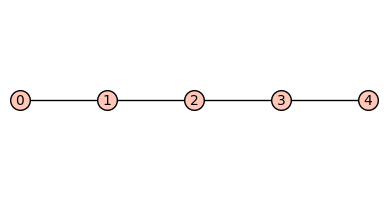

In [1]:
g = graphs.PathGraph(5)
# g = graphs.CycleGraph(5)
# g = graphs.PetersenGraph()
g.show()

Or, one may use  
the **vertex set** and the **edge set**  
to define a graph.

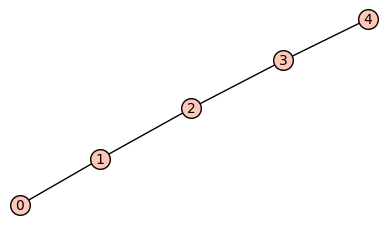

In [3]:
V = [0,1,2,3,4]
E = [(0,1), (1,2), (2,3), (3,4)]
g = Graph([V,E])
g.show()

Alternatively,  
build the graph by **adding vertices/edges**.

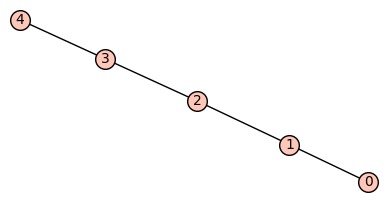

In [6]:
### start with one vertex without any edge
g = Graph(1) 
### keep adding vertices and edges
for i in range(1,5):
    g.add_vertex(i)
    g.add_edge(i,i-1)
g.show()

The `show` function  
has many keywords for you  
to adjust the **graph illustration**.

See [Sage Reference Manual](http://doc.sagemath.org/html/en/reference/plotting/sage/graphs/graph_plot.html) for more details.

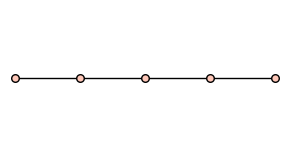

In [11]:
g = graphs.PathGraph(5)
g.show(figsize=[3,3], 
       vertex_labels=False, 
       vertex_size=30
      )

## Work on a grpah

Once a graph `g` is built,  
there are many **associated functions**.  

When the cursor is at the end of `g.`  
press `tab` to see them.

In [ ]:
g.

Thus, you may easily call  
the **adjacency matrix** or the **Laplacian matrix**.

In [19]:
g = graphs.PathGraph(5)
A = g.adjacency_matrix()
# A = g.laplacian_matrix()
A

[0 1 0 0 0]
[1 0 1 0 0]
[0 1 0 1 0]
[0 0 1 0 1]
[0 0 0 1 0]

Find the **vertex set**  
and the **edge set**.

In [18]:
g = graphs.PathGraph(5)
V = g.vertices()
E_with_label = g.edges()
E_without_label = g.edges(labels=False)
print('V:', V)
print('E_with_label', E_with_label)
print('E_without_label', E_without_label)

V: [0, 1, 2, 3, 4]
E_with_label [(0, 1, None), (1, 2, None), (2, 3, None), (3, 4, None)]
E_without_label [(0, 1), (1, 2), (2, 3), (3, 4)]


Find the **neighbors**  
of a vertex.

In [20]:
g = graphs.PathGraph(5)
g.neighbors(1)

[0, 2]

Call the (induced) **subgraph**.

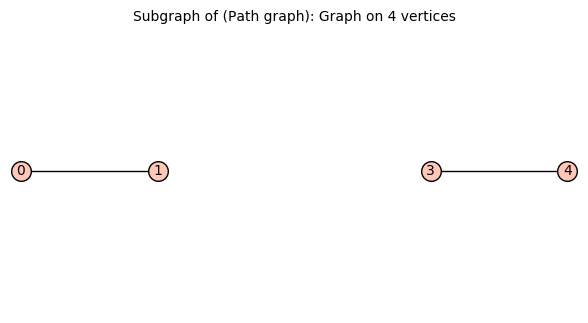

In [21]:
g = graphs.PathGraph(5)
g.subgraph([0,1,3,4])

[nauty and Traces](http://pallini.di.uniroma1.it/)  
are programs developed by Brendan McKay and Adolfo Piperno  
used for computing graph automorphism,  
testing graph isomorphism, generating non-isomorphic graphs,  
and many more.

One may use Sage to call `nauty`  
and **search for graphs**.  

In the example below,  
`4 -c` stands for 4 vertices and connected graphs.

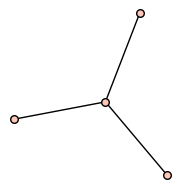

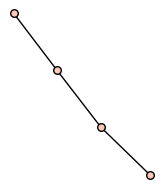

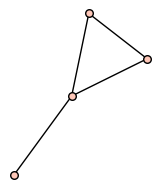

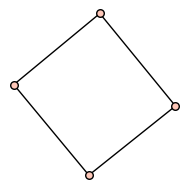

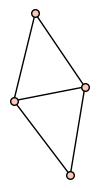

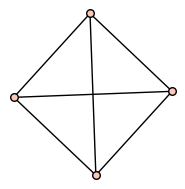

In [24]:
for g in graphs.nauty_geng('4 -c'):
    g.show(figsize=[2,2], 
       vertex_labels=False, 
       vertex_size=30
          )

Each graph under a labeling  
has a **graph6 string**.

In [31]:
g = graphs.CycleGraph(4)
g.graph6_string()

'Cl'

Different labelings  
results in different strings.

In [33]:
h = graphs.CompleteBipartiteGraph(2,2)
h.graph6_string()

'C]'

Each graph has a **canonical labeling**  
that provides a "standard" way  
to label the graph.  

Thus, one may use it to test isomorphism.

In [36]:
g = graphs.CycleGraph(4)
h = graphs.CompleteBipartiteGraph(2,2)
print(g.canonical_label().graph6_string())
print(h.canonical_label().graph6_string())

Cr
Cr


## Zero forcing

[Minimum Rank Sage Library](https://github.com/jephianlin/mr_JG):  computing bounds of minimum rank, and many other features.  
[minrank_aux](https://github.com/jephianlin/minrank_aux):  auxiliary tools for the minimum rank problem  

The `load_all` function is provided  
to load both libraries.

If the output reaches the line

    Loading matrix_forcing.py...  

then it is likely to work.  

If there is any error,  
please report it to Jephian Lin `jephianlin [at] gmail [dot] com`.

In [1]:
load("https://raw.githubusercontent.com/jephianlin/minrank_aux/master/load_all.py")
load_all()

xrange test failed: define xrange = range
Loading Zq_c.pyx...


Compiling /home/jephian/.sage/temp/webwork/8835/tmp__zp3u4dr.pyx...


Loading Zq.py...
Loading zero_forcing_64.pyx...


Compiling /home/jephian/.sage/temp/webwork/8835/tmp_vrkgv6jw.pyx...


Loading zero_forcing_wavefront.pyx...


Compiling /home/jephian/.sage/temp/webwork/8835/tmp_vg849osa.pyx...


Loading minrank.py...
Loading inertia.py...
Loading general_Lib.sage...
---sshow, multi_sshow, tuple_generator, minimal_graphs, empty_array, all_one_matrix, elementary_matrix, eigens_multi, sort_dictionary, has_minor, etc.
Loading oc_diag_analysis.sage...
---gZ_leq, find_gZ, find_EZ, diagonal_analysis, etc.
Loading xi_dict.py...
---SAPreduced_matrix, has_SAP, find_ZFloor, Zsap, etc.
Loading mu_dict.py...
---get_mu_from_dict, find_mu, etc.
Loading SXP.sage...
This code contains extra copy of Z_game, Zell_game, Zplus_game, for the completeness of Zsap_game program.
Loading matrix_forcing.py...


There have been many attempts to  
implement efficient program for zero forcing.
- `find_Z`: return $Z(G)$ 
- `zero_forcing_set_bruteforce`: return a minimum zero forcing set
- `zero_forcing_set_wavefront`: return a minimum zero forcing set, using the wavefront algorithm
- `zerosgame`: return the derived set

In [12]:
g = graphs.PetersenGraph()
print('Z(G) is', find_Z(g))
print('A zero forcing set is', zero_forcing_set_bruteforce(g))

Z(G) is 5
A zero forcing set is {0, 1, 2, 3, 4}


The wavefront algorithm provides  
efficient way to compute the minimum zero forcing set.  

The output is a tuple containing  
the zero forcing number,  
a zero forcing set, and  
the number of closures.

In [16]:
g = graphs.PetersenGraph()
zero_forcing_set_wavefront(g)

(5, [0, 2, 4, 5, 7], 26)

The function `zerosgame(graph, initial_set)`  
will return the derived set on `graph`  
starting with `initial_set`.

In [17]:
g = graphs.PathGraph(5)
zerosgame(g, [0])

[0, 1, 2, 3, 4]

There are functions for  
the variants of zero forcing:
- `Zplus`: positive semidefinite zero forcing $Z_+(G)$
- `find_loopedZ`: zero forcing for loop graphs
- `find_EZ`: enhanced zero forcing $\widehat{Z}(G)$

### Exercises

##### Exercise
Create a double star `g` on $10$ vertices  
with $3$ leaves sharing a common neighbor  
and another $5$ leaves sharing another common neighbor.

In [24]:
### your answer here

##### Exercise
Create the $5$-sun `g` on 10 vertices  
obtained by adding 5 leaves to  
each vertices of $C_5$.

In [24]:
### your answer here

##### Exercise
Create a graph `g` on 10 vertices  
obtained from three disjoint paths $P_4$  
by picking an endpoint from each of them  
and identifying these endpoints.

In [24]:
### your answer here

##### Exercise
Search through all connected graphs on 5 vertices  
print the graph6 string and the zero forcing number  
for each of them.  

Which one has the largest zero forcing number?  
Which one has the smallest zero forcing number?

In [24]:
### your answer here

##### Exercise
Let `g` be a graph  
and `B` a list of vertices of `g`.  

Write a function to test  
if any forces can be performed  
on `g` with the blue vertices `B`.

In [24]:
### your answer here

##### Exercise
Write a function `my_zfgame(g, B)`  
that compute the derived set of `B` on `g`.  
(That is, write `zerosgame` by yourself.)

In [24]:
### your answer here

##### Exercise
The code below allows you to  
run through all the posisble `k`-subset of `V`.
```
for com in Combinations(V, k):
    print(com)
```
Use it along with your `my_zfgame`  
to write a function  
for computing the zero forcing number.

In [24]:
### your answer here

##### Exercise
A **fort** on a graph $G$  
is a set $F$ of vertices such that  
every vertex outside $F$  
has either no or more than two neighbors in $F$.  
(A zero forcing set must intersect with a fort.)

Write a function `is_fort(g, F)`  
to test if a list `F` is a fort of `g` or not. 

In [24]:
### your answer here